In [1]:
#equilibrium.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 16 March 2018.
#simulate a narrow eccentric ringlet initialized at equilibrium

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape

r.shape =  (1001, 2, 101)


In [3]:
#calculate da, de, dwt differences at inner & outer streamline's periapse
from level_curves import *
da, de, dwt, a_avg, e_avg = calculate_deltas(r, a, e, wt)

In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

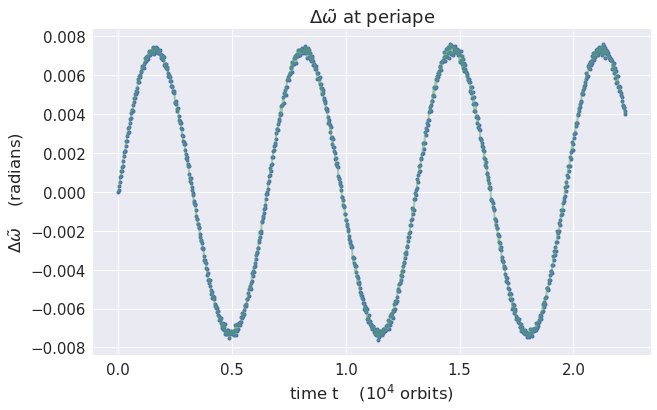

In [5]:
#plot dwt versus time
x = times/(2*np.pi)/1.0e4
y = dwt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'$\Delta\tilde{\omega}$ at periape')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')

In [6]:
#equilibrium de
de_eq = 0.5*(de.max() + de.min())
print 'de_eq = ', de_eq

de_eq =  0.000588987706279


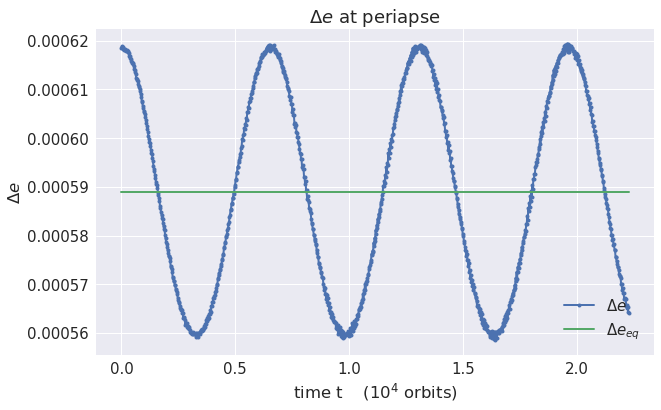

In [7]:
#plot delta_e versus time
x = times/(2*np.pi)/1.0e4
y = de
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = x*0 + de_eq
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e_{eq}$')
p = ax.set_title(r'$\Delta e$ at periapse')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')
p = plt.legend()

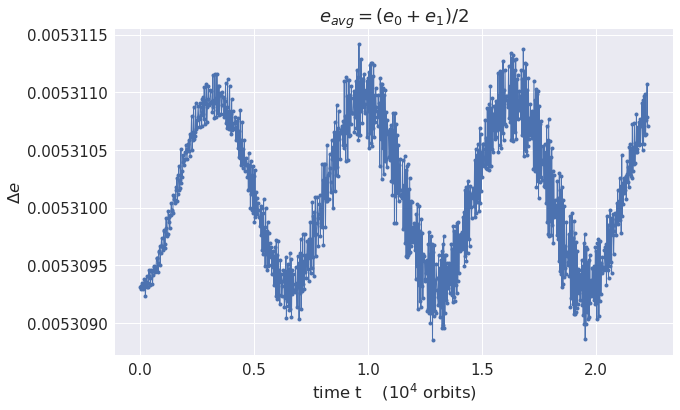

In [8]:
#plot e_avg versus time
x = times/(2*np.pi)/1.0e4
y = e_avg
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='-', linewidth=1)
p = ax.set_title(r'$e_{avg} = (e_0+e_1)/2$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Delta e$')

In [9]:
#lowest-order q2 and H(q2)
H, q2 = H_q2(a_avg, e_avg, da, de, dwt)
q = np.sqrt(q2)

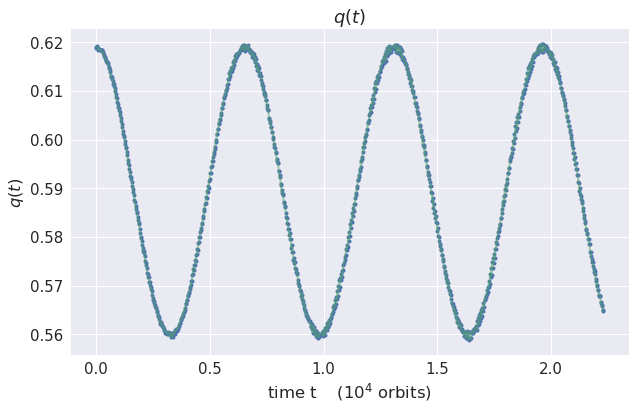

In [10]:
#plot q versus time
x = times/(2*np.pi)/1.0e4
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$q(t)$')

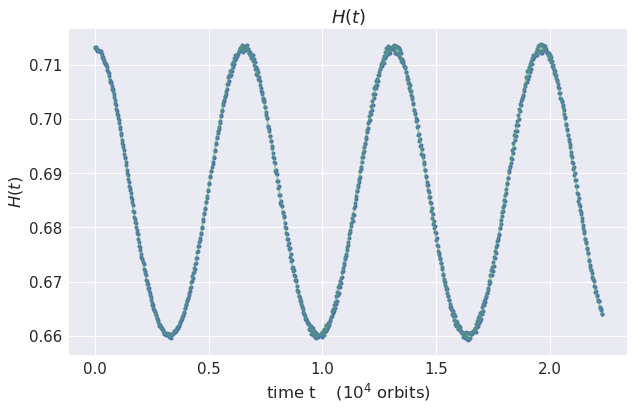

In [11]:
#plot H(q2) versus time
x = times/(2*np.pi)/1.0e4
y = H
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'$H(t)$')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$H(t)$')

In [12]:
#integral of motion...fudge_factor=1
fudge_factor = 1.0
Ix = (e_avg*a_avg/da)*dwt
Iy = fudge_factor*(de_eq - de)*(a_avg/da)
I = np.sqrt(Ix**2 + Iy**2)
print 'intitial I = ', I[0]

intitial I =  0.029647664744


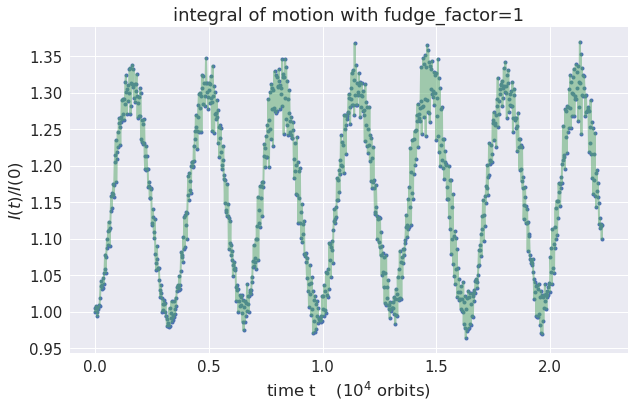

In [13]:
#plot I versus time
x = times/(2*np.pi)/1.0e4
y = I/I[0]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'integral of motion with fudge_factor=1')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$I(t)/I(0)$')

In [14]:
#integral of motion...fudge_factor=4/3
fudge_factor = 4/3.0
de_eq = 0.5*(de.max() + de.min())
Ix = (e_avg*a_avg/da)*dwt
Iy = fudge_factor*(de_eq - de)*(a_avg/da)
I = np.sqrt(Ix**2 + Iy**2)
print 'intitial I = ', I[0]

intitial I =  0.0395302027295


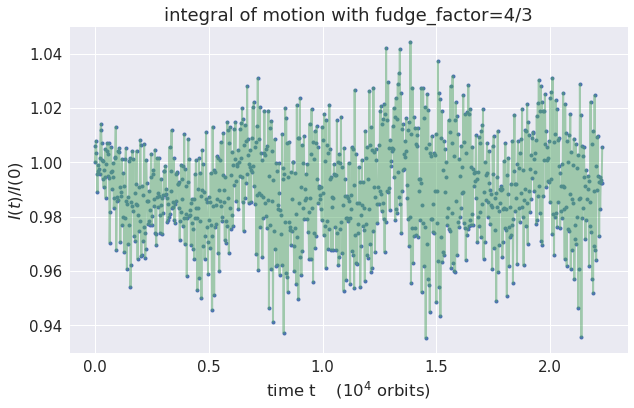

In [15]:
#plot I versus time
x = times/(2*np.pi)/1.0e4
y = I/I[0]
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'integral of motion with fudge_factor=4/3')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$I(t)/I(0)$')

In [16]:
#BGT's equilibrium de
M_central = 1.0
Ra = (Rp/a_avg).mean()
da_over_a = (da/a_avg).mean()
H_avg = 0.5*(H.min() + H.max())
de_eq_bgt = (21.0/4)*np.pi*e_avg.mean()*J2*(M_central/total_ring_mass)*(Ra**2)*(da_over_a**3)/H_avg
print 'equilibrium de_eq = ', de_eq
print 'equilibrium de_eq_bgt = ', de_eq_bgt

equilibrium de_eq =  0.000588987706279
equilibrium de_eq_bgt =  0.000636243055833


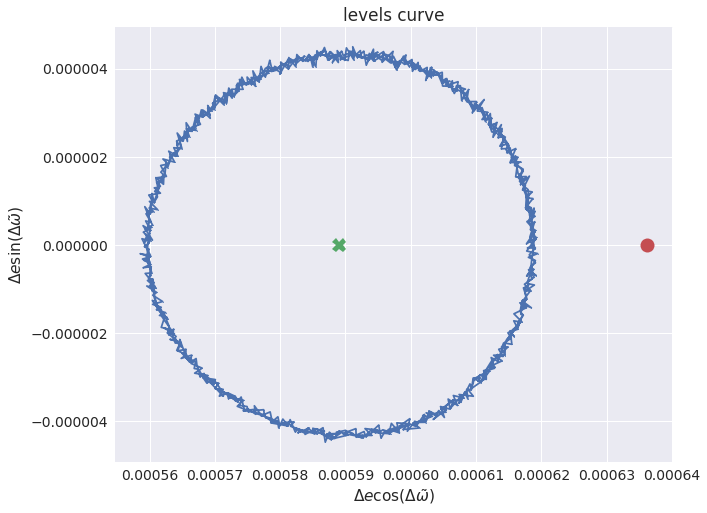

In [17]:
#plot delta_wt and delta_e versus time
sns.set(font_scale=1.4, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 8))
p = ax.set_title('levels curve')
p = ax.set_xlabel(r'$\Delta e\cos(\Delta\tilde{\omega})$')
p = ax.set_ylabel(r'$\Delta e\sin(\Delta\tilde{\omega}$)')
x = de*np.cos(dwt)
y = de*np.sin(dwt)
p = ax.plot(x, y, marker='o', markersize=1, linestyle='-')
p = ax.plot(de_eq, 0, marker='X', markersize=14, linestyle='none')
p = ax.plot(de_eq_bgt, 0, marker='o', markersize=14, linestyle='none')

In [18]:
#BGT libration period
GM = 1.0
a3 = (a_avg**3).mean()
a_over_da = (a_avg/da).mean()
n = np.sqrt(GM/a3)
omega_bgt = (total_ring_mass/M_central)*(a_over_da**2)*n*H_avg/np.pi
T_bgt = 2*np.pi/omega_bgt
print 'BGT libration period (10^5 orbits) = ', T_bgt/1.0e5

BGT libration period (10^5 orbits) =  0.574876638847


In [19]:
#simulation's libration frequency
phase = np.arctan2(Iy, Ix)
for idx in range(len(phase)-1):
    delta_phase = phase[idx+1] - phase[idx]
    if (delta_phase < -np.pi):
        phase[idx+1:] += 2.0*np.pi
    if (delta_phase > np.pi):
        phase[idx+1:] -= 2.0*np.pi
coeff = np.polyfit(times, phase, 1)
omega = coeff[0]
T = 2*np.pi/omega
print 'omega, omega_bgt = ', omega, omega_bgt
print 'omega/omega_bgt = ', omega/omega_bgt
print 'T, T_bgt (10^5 orbits) = ', T/1.0e5, T_bgt/1.0e5

omega, omega_bgt =  0.000152855701409 0.00010929623649
omega/omega_bgt =  1.39854496658
T, T_bgt (10^5 orbits) =  0.411053382326 0.574876638847


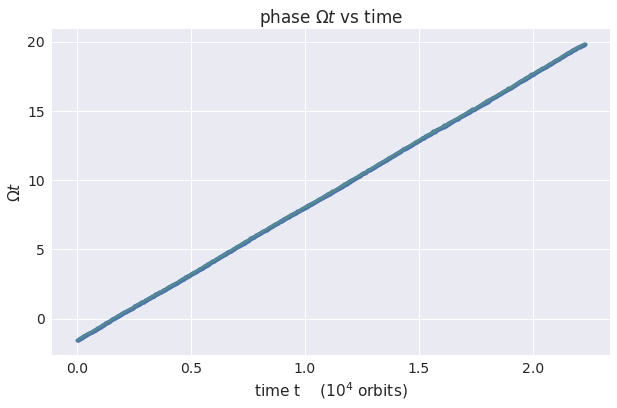

In [20]:
#check phase vs time
x = times/(2*np.pi)/1.0e4
y = phase
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, marker='o', markersize=4, linestyle='none')
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=2)
p = ax.set_title(r'phase $\Omega t$ vs time')
p = ax.set_xlabel(r'time t    ($10^4$ orbits)')
p = ax.set_ylabel(r'$\Omega t$')